In [24]:
from keras.datasets import cifar10
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from numpy import argmax, array

from keras.losses import categorical_crossentropy

# Programming Questions

## Dataset 1 

### Load and Split Data

In [25]:
spam_data = pd.read_csv('spambase.csv', header = None)
spam_data = shuffle(spam_data,random_state = 32)
spam_data

0     1     2    3     4     5    6     7     8     9   ...     48  \
3586  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.000   
615   0.00  0.00  0.90  0.0  0.45  0.00  0.0  0.00  0.00  0.00  ...  0.000   
831   0.18  0.00  0.09  0.0  0.36  0.09  0.0  0.36  0.09  0.00  ...  0.000   
2167  0.90  0.00  0.90  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.000   
360   0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.000   
...    ...   ...   ...  ...   ...   ...  ...   ...   ...   ...  ...    ...   
4030  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.000   
2940  0.05  0.00  0.45  0.0  0.15  0.10  0.0  0.00  0.55  0.00  ...  0.203   
1334  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  3.77  ...  0.264   
1579  0.13  0.13  0.26  0.0  0.26  0.26  0.0  0.13  0.39  0.13  ...  0.000   
2775  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.84  ...  0.000   

         49     50     51     52     53     54  55    56  57  
3586  0.000  0.000  0.000  0.000  0.000  1.000   1     5   0  
615   0.000  0.000  2.115  0.070  0.000  2.651  14   114   1  
831   0.060  0.030  0.030  0.015  0.000  4.192  48   566   1  
2167  0.112  0.000  0.225  0.000  0.000  1.807  10    47   0  
360   0.000  0.000  5.000  0.000  0.000  1.000   1     2   1  
...     ...    ...    ...    ...    ...    ...  ..   ...  ..  
4030  0.000  0.000  0.000  0.000  0.000  3.250  10    13   0  
2940  0.195  0.050  0.000  0.014  0.000  2.880  45  1080   0  
1334  0.000  0.000  0.000  0.000  0.000  4.333  13    78   1  
1579  0.137  0.000  0.000  0.068  0.000  2.736  30   468   1  
2775  0.000  0.137  0.413  0.000  0.137  3.052  13   116   0  

[4601 rows x 58 columns]

### Split the data in training, evalatuation and testing data

    - TRAINING DATA (60%) :  920 IMAGES
    - EVALUATION DATA (20%) : 920  IMAGES
    - TESTING DATA (20%) : 2761 IMAGES 

In [26]:
coef_test = 0.2
coef_eval = 0.2

### Load_spam_data

In [27]:
def load_spam_data(spam_data,coef_test,coef_eval):
    

    
    # RANDOMIZE THE DATA BECAUSE IS ORGANIZE AND TENSORIZE THE DATA 
    
    spam_data = spam_data.values
    
    x_spam_data = spam_data[:,0:56]
    y_spam_data = spam_data[:,57]
    
    num_data = len(x_spam_data)
    num_data_test = round (num_data * coef_test)
    num_data_eval = round (num_data * coef_eval)
        
    
    # TEST DATA: DIVIDE FROM THE DATA 

    x_spam_data_test = x_spam_data[num_data - num_data_test:,:]
    y_spam_data_test = y_spam_data[num_data - num_data_test:]
    
    # TRAIN DATA: FIRST NORMALIZE AND THEN DIVIDE IN EVALUATION AND TRAINING DATA
    
    x_spam_data_train = x_spam_data[0:num_data - num_data_test,:]
    y_spam_data_train = y_spam_data[0:num_data - num_data_test]
    x_spam_data_train_mean = x_spam_data_train.mean(axis = 0)
    x_spam_data_train -= x_spam_data_train_mean
    x_spam_data_train_std = x_spam_data_train.std(axis = 0)
    x_spam_data_train /= x_spam_data_train_std
    
    x_spam_data_eval = x_spam_data_train[len(x_spam_data_train) - num_data_eval:len(x_spam_data_train),:]
    y_spam_data_eval = y_spam_data_train[len(x_spam_data_train) - num_data_eval:len(x_spam_data_train)]
    m = len(x_spam_data_train)
    x_spam_data_train = x_spam_data_train[0:m - num_data_eval,:]
    y_spam_data_train = y_spam_data_train[0:m - num_data_eval]
    
    # NORMALIZE A THE TEST DATA
    
    x_spam_data_test -= x_spam_data_train_mean
    x_spam_data_test /= x_spam_data_train_std
    
    return x_spam_data_test,y_spam_data_test,x_spam_data_eval,y_spam_data_eval,x_spam_data_train,y_spam_data_train

In [28]:
x_spam_data_test,y_spam_data_test,x_spam_data_eval,y_spam_data_eval,x_spam_data_train,y_spam_data_train = load_spam_data(spam_data,coef_test,coef_eval)

### Models

In [51]:
def create_model(model_name):
    if model_name==1:
        
        model1 = Sequential()
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(8,activation='relu'))
        model1.add(Dense(1,activation='sigmoid'))
        return model1
    
    if model_name==2:
        
        model1 = Sequential()
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(8,activation='relu'))
        model1.add(Dense(1,activation='sigmoid'))
        return model1
    
    if model_name==3:
        
        model1 = Sequential()
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(8,activation='relu'))
        model1.add(Dense(1,activation='sigmoid'))
        return model1

In [69]:
def bestModel(regularization):

    model3 = Sequential(name='Best_Model')
    model3.add(Dense(32))

    if regularization == 'batchN': # Just Batch Normalization

        model3.add(BatchNormalization())
        model3.add(Dense(32,activation='relu'))
        model3.add(Dense(16,activation='relu'))
        model3.add(Dense(8,activation='relu'))
        model3.add(Dense(1,activation='sigmoid'))
        return model3

    if regularization == 'dropout': # Batch Normalization + Dropout

        model3.add(BatchNormalization())
        model3.add(Activation('relu'))
        model3.add(Dense(32,activation='relu'))
        model3.add(Dropout(0.5))
        model3.add(Dense(16,activation='relu'))
        model3.add(Dense(8,activation='relu'))
        model3.add(Dense(1,activation='sigmoid'))
        return model3

    if regularization == 'weightDecay': # Batch Normalization + Dropout + Weight Decay

        model3.add(BatchNormalization())
        model3.add(Activation('relu'))
        model3.add(Dense(32,activation='relu'))
        model3.add(Dropout(0.5))
        model3.add(Dense(16,activation='relu'))
        model3.add(Dense(8,activation='relu',kernel_regularizer='l2'))
        model3.add(Dense(1,activation='sigmoid'))
        return model3

### Evaluation

In [55]:
def modelEvaluation(modelID,optimizer='adam',loss = 'binary_crossentropy',epochs=16,batch_size=32,best_model = False, regularization = 'batchN', plot=True):

    if best_model:
        model = bestModel(regularization=regularization)
    else:
        model = create_model(modelID)
    
    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
  
    hist = model.fit(x_spam_data_train, y_spam_data_train, validation_data=(x_spam_data_eval, y_spam_data_eval), epochs=epochs,verbose=0,batch_size=batch_size)
   
    
    if(plot):
        #Visualize the models accuracy
        plt.plot(hist.history['accuracy'])
        plt.plot(hist.history['val_accuracy'])
        plt.title('Accuracy {}'.format(model.name))
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()

        #Visualize the models loss
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['val_loss'])
        plt.title('Loss {}'.format(model.name))
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()
    
    loss_train = hist.history['loss'][-1]
    acc_train = hist.history['accuracy'][-1]
    loss_val = hist.history['val_loss'][-1]
    acc_val = hist.history['val_accuracy'][-1]
    
    print("Loss-> Train Set:{:.2f}; Test Set:{:.2f} (Diff: {:2f})".format(loss_train,loss_val,abs(loss_train-loss_val)))
    print("Accuracy-> Train Set:{:.2f}; Test Set:{:.2f} (Diff: {:2f})".format(acc_train,acc_val,abs(acc_train-acc_val)))
    
    return loss_train, acc_train, loss_val, acc_val
    
    
    

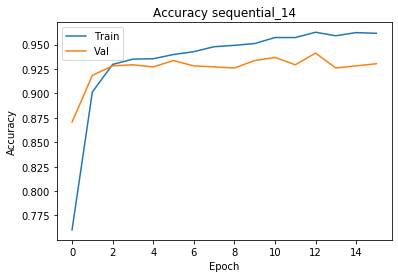

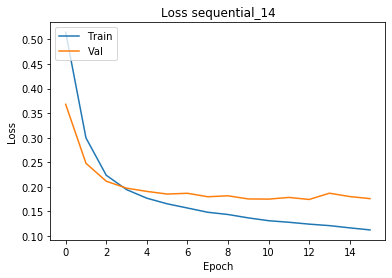

Loss-> Train Set:0.11; Test Set:0.18 (Diff: 0.063636)
Accuracy-> Train Set:0.96; Test Set:0.93 (Diff: 0.031173)


(0.11236437281127513, 0.9616081, 0.1760002701178841, 0.93043476)

In [56]:
modelEvaluation(modelID=1)

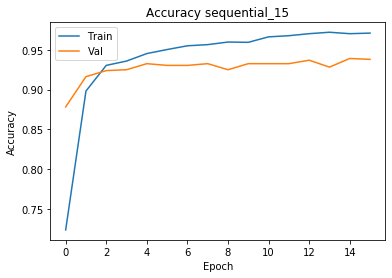

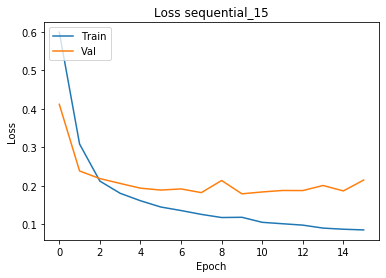

Loss-> Train Set:0.09; Test Set:0.22 (Diff: 0.129531)
Accuracy-> Train Set:0.97; Test Set:0.94 (Diff: 0.032982)


(0.08560857066816499, 0.971025, 0.21513996461163395, 0.9380435)

In [57]:
modelEvaluation(modelID=2)

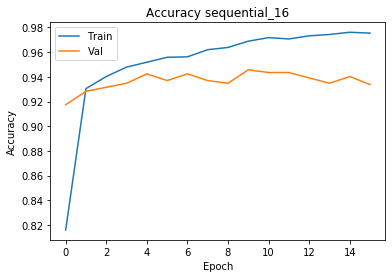

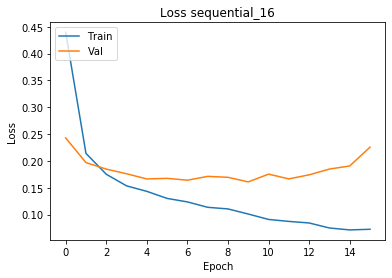

Loss-> Train Set:0.07; Test Set:0.23 (Diff: 0.153070)
Accuracy-> Train Set:0.98; Test Set:0.93 (Diff: 0.041676)


(0.07251403153978885, 0.97537124, 0.22558412746242854, 0.9336957)

In [58]:
modelEvaluation(modelID=3)

### Optimizers , epochs & Batch Sizes

In [59]:
epochs = [32,64]
batch_sizes = [32,128,256]
optimizers = ['sgd','RMSprop','adagrad','adam','adadelta','adamax','nadam']### Optimizers , epochs & Batch Sizes

In [60]:
results = pd.DataFrame(columns=['Optimizer','epochs','batch_sizes','loss_train', 'acc_train', 'loss_val', 'acc_val'])
results

Empty DataFrame
Columns: [Optimizer, epochs, batch_sizes, loss_train, acc_train, loss_val, acc_val]
Index: []

In [61]:
for optimizer in optimizers:
    for epoch in epochs:
        for batch_size in batch_sizes:
            loss_train, acc_train, loss_val, acc_val = modelEvaluation(modelID=2,optimizer=optimizer,epochs=epoch,batch_size=batch_size,plot=False)
            results = results.append({'Optimizer':optimizer,'epochs':epoch,'batch_sizes':batch_size,'loss_train':loss_train, 'acc_train':acc_train, 'loss_val':loss_val, 'acc_val':acc_val},ignore_index=True)

Loss-> Train Set:0.15; Test Set:0.19 (Diff: 0.044416)
Accuracy-> Train Set:0.95; Test Set:0.93 (Diff: 0.022119)
Loss-> Train Set:0.30; Test Set:0.29 (Diff: 0.011379)
Accuracy-> Train Set:0.90; Test Set:0.90 (Diff: 0.001413)
Loss-> Train Set:0.61; Test Set:0.62 (Diff: 0.004459)
Accuracy-> Train Set:0.62; Test Set:0.61 (Diff: 0.005210)
Loss-> Train Set:0.13; Test Set:0.20 (Diff: 0.068785)
Accuracy-> Train Set:0.96; Test Set:0.93 (Diff: 0.030448)
Loss-> Train Set:0.20; Test Set:0.22 (Diff: 0.018843)
Accuracy-> Train Set:0.93; Test Set:0.92 (Diff: 0.010532)
Loss-> Train Set:0.29; Test Set:0.31 (Diff: 0.012815)
Accuracy-> Train Set:0.89; Test Set:0.89 (Diff: 0.001772)
Loss-> Train Set:0.05; Test Set:0.26 (Diff: 0.208733)
Accuracy-> Train Set:0.98; Test Set:0.93 (Diff: 0.052905)
Loss-> Train Set:0.10; Test Set:0.19 (Diff: 0.088894)
Accuracy-> Train Set:0.97; Test Set:0.93 (Diff: 0.035882)
Loss-> Train Set:0.10; Test Set:0.19 (Diff: 0.084306)
Accuracy-> Train Set:0.97; Test Set:0.94 (Diff: 0.

In [62]:
results.loc[results['acc_val'].idxmax(),:]

Optimizer           adam
epochs                64
batch_sizes          256
loss_train     0.0596038
acc_train        0.98515
loss_val        0.197509
acc_val         0.945652
Name: 23, dtype: object

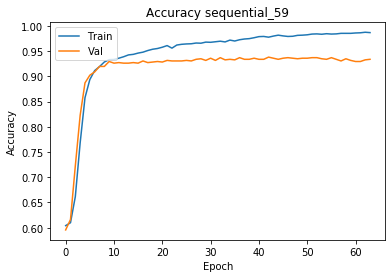

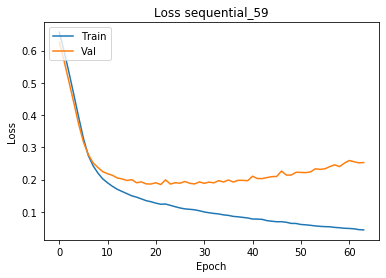

Loss-> Train Set:0.04; Test Set:0.25 (Diff: 0.208804)
Accuracy-> Train Set:0.99; Test Set:0.93 (Diff: 0.052903)


(0.04384798381028293, 0.9865991, 0.25265244077081267, 0.9336957)

In [63]:
modelEvaluation(modelID=2,optimizer='adam',epochs=64,batch_size=256)

### Regularization

In [75]:
def ensembleModel(optimizer='adam',loss = 'binary_crossentropy',epochs=64,batch_size=256, regularization = 'batchN',members = 10):

    models = []
    for i in range(members): # Fit
        model = bestModel(regularization=regularization)
        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        model.fit(x_spam_data_train, y_spam_data_train, epochs=epochs,verbose=0,batch_size=batch_size)
        models.append(model)
    
   

    # Train Set
    y_prob = [model.predict(x_spam_data_train) for model in models]
    y_prob = np.array(y_prob)

    y_prob_sum = np.sum(y_prob, axis=0) # sum across ensemble members

    y_pred = argmax(y_prob_sum, axis=1)
    y_pred = to_categorical(y_pred)

    acc_train = accuracy_score(y_spam_data_train,y_pred)

    # Validation Set
    y_prob = [model.predict(x_spam_data_eval) for model in models]
    y_prob = np.array(y_prob)

    y_prob_sum = np.sum(y_prob, axis=0) # sum across ensemble members

    y_pred = argmax(y_prob_sum, axis=1)
    y_pred = to_categorical(y_pred)

    acc_val = accuracy_score(y_spam_data_eval,y_pred)
    

    

    return models, acc_train, acc_val
  

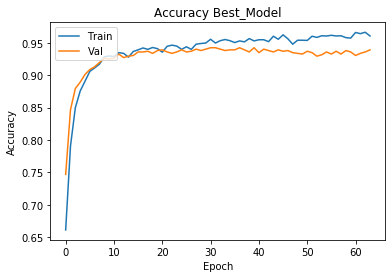

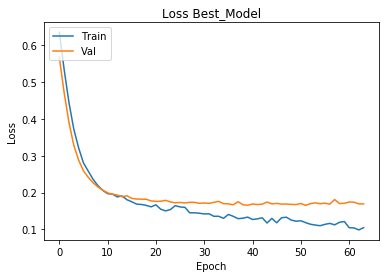

Loss-> Train Set:0.10; Test Set:0.17 (Diff: 0.064531)
Accuracy-> Train Set:0.96; Test Set:0.94 (Diff: 0.021391)


In [71]:
# Batch Normalization
model = modelEvaluation(best_model=True,optimizer='adam',modelID=2,regularization='batchN',epochs=64,batch_size=256)

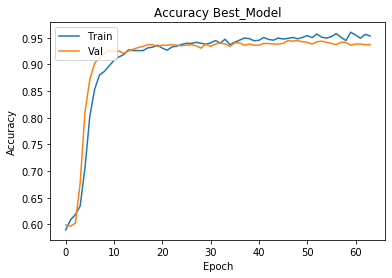

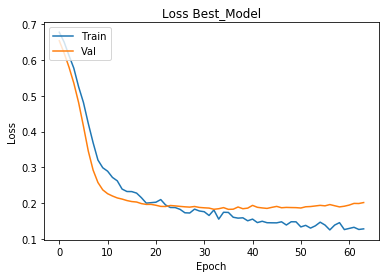

Loss-> Train Set:0.13; Test Set:0.20 (Diff: 0.073336)
Accuracy-> Train Set:0.95; Test Set:0.94 (Diff: 0.016321)


In [72]:
# Batch Normalization + Dropout
model = modelEvaluation(best_model=True,optimizer='adam',modelID=2,regularization='dropout',epochs=64,batch_size=256)

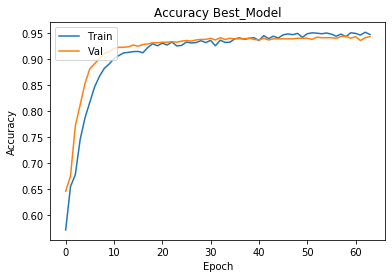

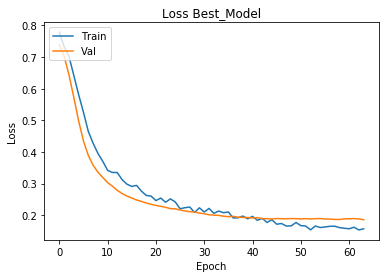

Loss-> Train Set:0.16; Test Set:0.19 (Diff: 0.028691)
Accuracy-> Train Set:0.95; Test Set:0.94 (Diff: 0.004005)


In [73]:
# Batch Normalization + Dropout + Weight Decay
model = modelEvaluation(best_model=True,optimizer='adam',modelID=2,regularization='weightDecay',epochs=64,batch_size=256)

In [76]:
# Batch Normalization + Dropout + Weight Decay + Ensembling
acc_ensembles_train = {}
acc_ensembles_val = {}
member_set = [5, 10, 15]
models_ensemblings = {}
for member in member_set:
    models, acc_train, acc_val = ensembleModel(optimizer='adam',regularization='weightDecay',epochs=64,batch_size=256,members=member)
    models_ensemblings[member] = models
    acc_ensembles_train[member] = acc_train
    acc_ensembles_val[member] = acc_val

In [77]:
train_ensemble = [acc_ensembles_train[_] for _ in acc_ensembles_train]
val_ensemble = [acc_ensembles_val[_] for _ in acc_ensembles_val]

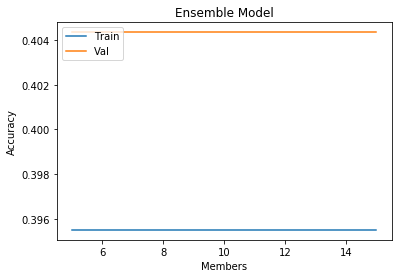

In [78]:
plt.plot(member_set,train_ensemble)
plt.plot(member_set,val_ensemble)
plt.title('Ensemble Model')
plt.ylabel('Accuracy')
plt.xlabel('Members')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Load Model

In [83]:
# load json and create model
json_file = open('classification_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("classification_model.h5")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Test set

In [80]:
#Test the model
model = bestModel(regularization='weightDecay')  
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_spam_data_train, y_spam_data_train, validation_data=(x_spam_data_eval, y_spam_data_eval), epochs=64,verbose=0,batch_size=256)


score = model.evaluate(x_spam_data_test,y_spam_data_test)
print("Loss in Test Set: {:.2f}".format(score[0]))
print("Accuracy in Test Set: {:.2f}".format(score[1]))

920/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss in Test Set: 0.19
Accuracy in Test Set: 0.94


### Save Model

In [82]:
# serialize model to JSON
model_json = model.to_json()
with open("classification_model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("classification_model.h5")
print("Saved model to disk")

Saved model to disk
